In [1]:
import numpy as np
import pandas as pd

from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

import thinkplot
import thinkstats2

In [2]:
raw_file = ('C:/Users/blain/Desktop/hotel-reservations.csv')
HotRes = pd.read_csv(raw_file)
HotRes.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
def categorise(row):  
    if row['booking_status'] == "Not_Canceled":
        return 0
    else:
        return 1

In [4]:
HotRes['booking_status_boolean'] = HotRes.apply(lambda row: categorise(row), axis=1)
HotRes.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,booking_status_boolean
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,1


In [5]:
HotRes.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_boolean
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655,0.327636
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [6]:
HotRes.mode()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,booking_status_boolean
0,INN00001,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,0.0,2018.0,10.0,13.0,Online,0.0,0.0,0.0,65.0,0.0,Not_Canceled,0.0
1,INN00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INN00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INN00004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INN00005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36271,INN36272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36272,INN36273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36273,INN36274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


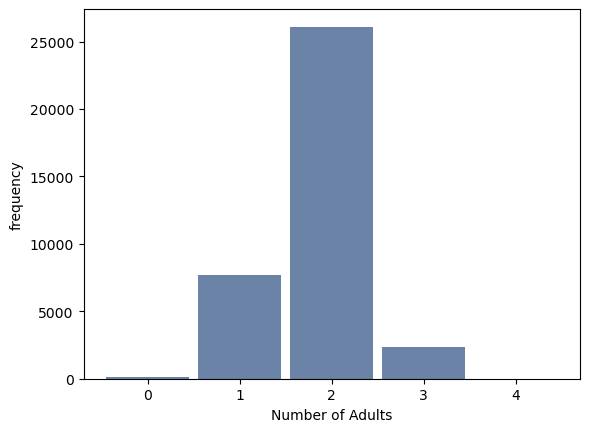

In [7]:
Adults = HotRes['no_of_adults']
Adults_Hist = thinkstats2.Hist(Adults)
thinkplot.Hist(Adults_Hist)
thinkplot.Config(xlabel='Number of Adults', ylabel='frequency')

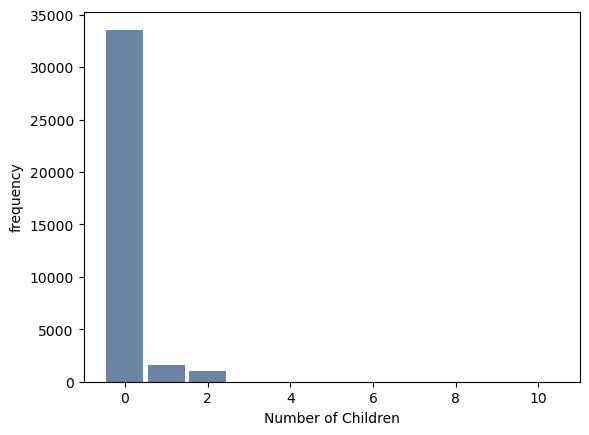

In [8]:
Children = HotRes['no_of_children']
Children_Hist = thinkstats2.Hist(Children)
thinkplot.Hist(Children_Hist)
thinkplot.Config(xlabel='Number of Children', ylabel='frequency')

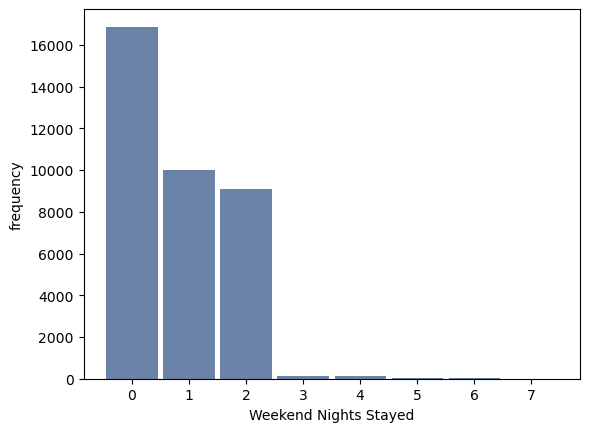

In [9]:
Weekend = HotRes['no_of_weekend_nights']
Weekend_Hist = thinkstats2.Hist(Weekend)
thinkplot.Hist(Weekend_Hist)
thinkplot.Config(xlabel='Weekend Nights Stayed', ylabel='frequency')

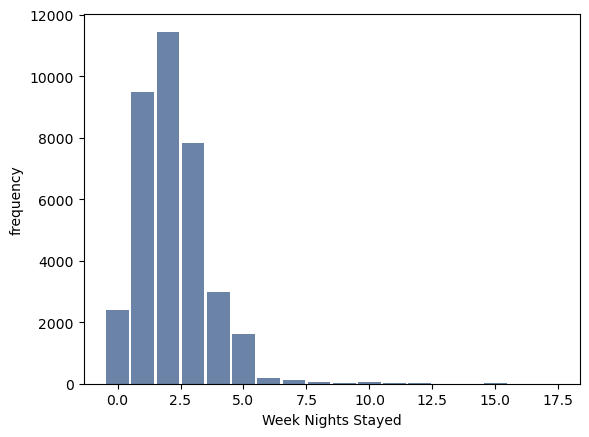

In [10]:
Weekday = HotRes['no_of_week_nights']
Weekday_Hist = thinkstats2.Hist(Weekday)
thinkplot.Hist(Weekday_Hist)
thinkplot.Config(xlabel='Week Nights Stayed', ylabel='frequency')

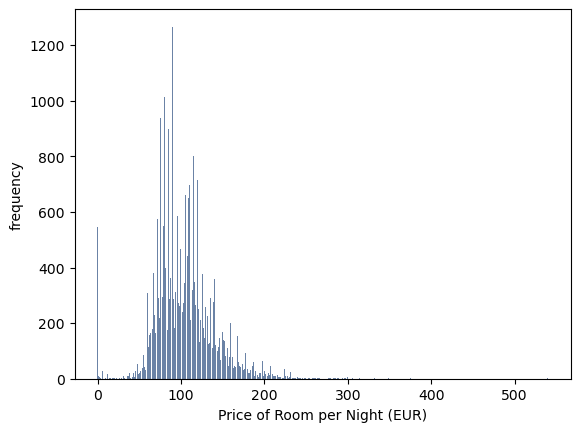

In [11]:
Price = np.floor(HotRes['avg_price_per_room'])
Price_Hist = thinkstats2.Hist(Price)
thinkplot.Hist(Price_Hist)
thinkplot.Config(xlabel='Price of Room per Night (EUR)', ylabel='frequency', height=100)

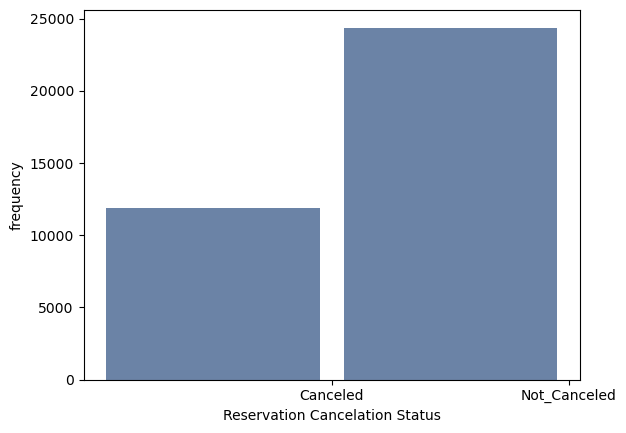

In [12]:
Status = HotRes['booking_status']
Status_Hist = thinkstats2.Hist(Status)
thinkplot.Hist(Status_Hist)
thinkplot.Config(xlabel='Reservation Cancelation Status', ylabel='frequency')

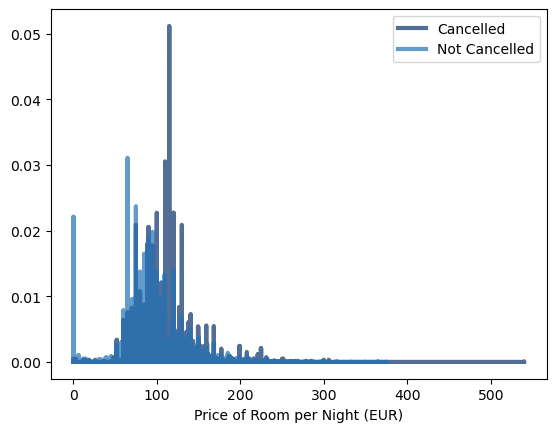

In [13]:
Not_Canceled = HotRes.loc[HotRes['booking_status'] == 'Not_Canceled']
Canceled = HotRes.loc[HotRes['booking_status'] == 'Canceled']

Not_Canceled_Price = Not_Canceled['avg_price_per_room']
Canceled_Price = Canceled['avg_price_per_room']


Price_Canceled_PMF = thinkstats2.Pmf(Canceled_Price, label = 'Cancelled')

Price_Fulfilled_PMF = thinkstats2.Pmf(Not_Canceled_Price, label = 'Not Cancelled')


thinkplot.Pmfs([Price_Canceled_PMF,Price_Fulfilled_PMF])
thinkplot.Config(xlabel='Price of Room per Night (EUR)', loc='upper right')

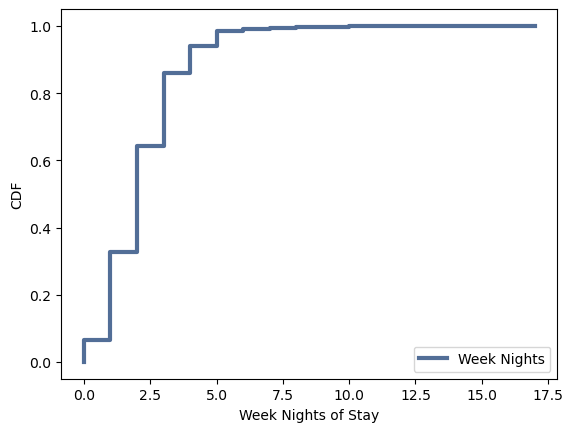

In [14]:
cdf = thinkstats2.Cdf(Weekday, label='Week Nights')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Week Nights of Stay', ylabel='CDF', loc='lower right')

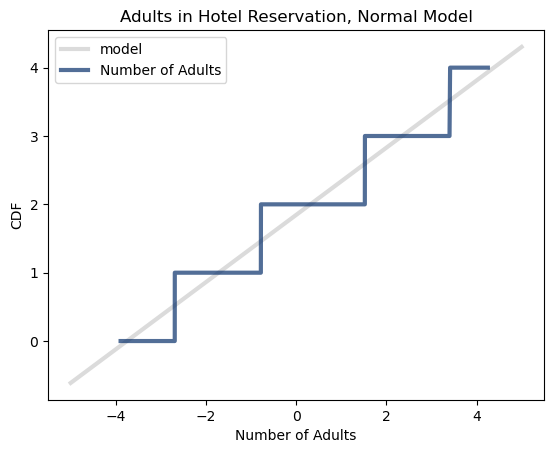

In [15]:
mean, var = thinkstats2.TrimmedMeanVar(Adults, p=0.01)
std = np.sqrt(var)

xs = [-5, 5]
xs, ys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(xs, ys, color="0.8", label="model")

xs, ys = thinkstats2.NormalProbability(Adults)
thinkplot.Plot(xs, ys, label="Number of Adults")

thinkplot.Config(
    title="Adults in Hotel Reservation, Normal Model",
    xlabel="Number of Adults",
    ylabel="CDF",
    loc="upper left",
)

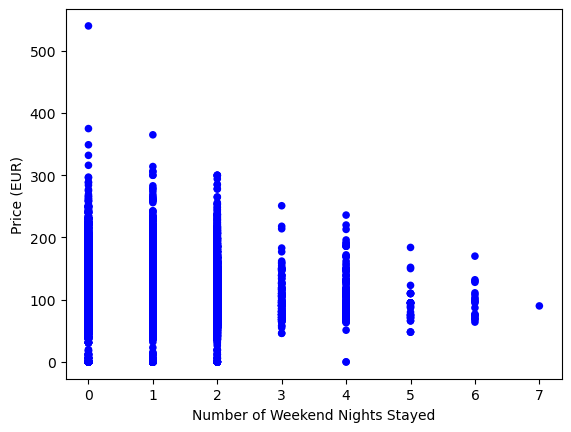

In [16]:
thinkplot.Scatter(Weekend, Price, alpha=1)
thinkplot.Config(xlabel='Number of Weekend Nights Stayed',
                 ylabel='Price (EUR)')

In [17]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [18]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [19]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [20]:
Cov(Weekend, Price)

-0.19374194578609974

In [21]:
Corr(Weekend, Price)

-0.006346095356937652

In [22]:
SpearmanCorr(Weekend, Price)

-0.028645287574360974

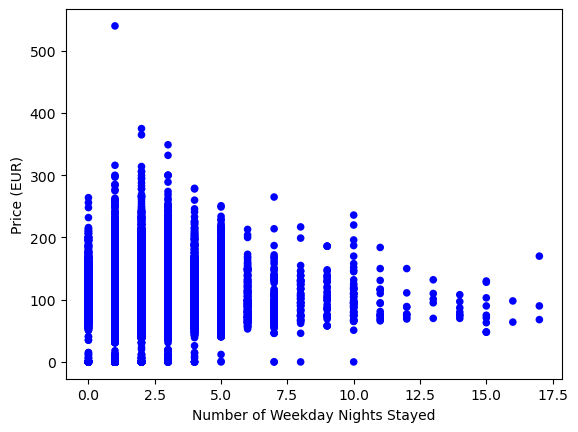

In [23]:
thinkplot.Scatter(Weekday, Price, alpha=1)
thinkplot.Config(xlabel='Number of Weekday Nights Stayed',
                 ylabel='Price (EUR)')

In [24]:
Cov(Weekday, Price)

1.0267473865548653

In [25]:
Corr(Weekday, Price)

0.020753398912294257

In [26]:
SpearmanCorr(Weekday, Price)

0.015951820081661704

In [27]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [28]:
data = Canceled_Price, Not_Canceled_Price
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [29]:
import statsmodels.formula.api as smf

formula = 'booking_status_boolean ~ avg_price_per_room + no_of_adults + no_of_children + no_of_weekend_nights + no_of_week_nights'
model = smf.ols(formula, data=HotRes)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     booking_status_boolean   R-squared:                       0.032
Model:                                OLS   Adj. R-squared:                  0.032
Method:                     Least Squares   F-statistic:                     239.1
Date:                    Sat, 04 Mar 2023   Prob (F-statistic):          4.47e-252
Time:                            01:59:07   Log-Likelihood:                -23445.
No. Observations:                   36275   AIC:                         4.690e+04
Df Residuals:                       36269   BIC:                         4.695e+04
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0081      0.011      0.759      0.448      -0.013       0.029
avg_price_per_room       0.0018   7.77e-05     23.489      0.000       0.002       0.002
no_of_adults             0.0300      0.005      6.008      0.000       0.020       0.040
no_of_children          -0.0182      0.006     -2.809      0.005      -0.031      -0.005
no_of_weekend_nights     0.0243      0.003      8.539      0.000       0.019       0.030
no_of_week_nights        0.0262      0.002     14.917      0.000       0.023       0.030
==============================================================================
Omnibus:                   391145.333   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5791.477
Skew:                           0.692   Prob(JB):                         0.00
Kurtosis:                       1.617   Cond. No.                         503.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""